# Probability and Statistics Assignment

### 1. Descriptive Statistics

Use a dataset : Iris Dataset. Perform the following tasks:    
 a. Compute the mean, median, and standard deviation for all numerical features.  
 b. Create histograms and boxplots for feature distributions.
 c. Calculate the correlation matrix for the features.
 d. Interpret which features are most correlated with each other.

Mean of sepal_length = 5.843333333333334
Median of sepal_length = 5.8
Ranges of sepal_length = 3.6000000000000005
Standard deviation of sepal_length = 0.8253012917851409
Mean of sepal_width = 3.0540000000000003
Median of sepal_width = 3.0
Ranges of sepal_width = 2.4000000000000004
Standard deviation of sepal_width = 0.4321465800705435
Mean of petal_length = 3.758666666666666
Median of petal_length = 4.35
Ranges of petal_length = 5.9
Standard deviation of petal_length = 1.7585291834055212
Mean of petal_width = 1.1986666666666668
Median of petal_width = 1.3
Ranges of petal_width = 2.4
Standard deviation of petal_width = 0.7606126185881716


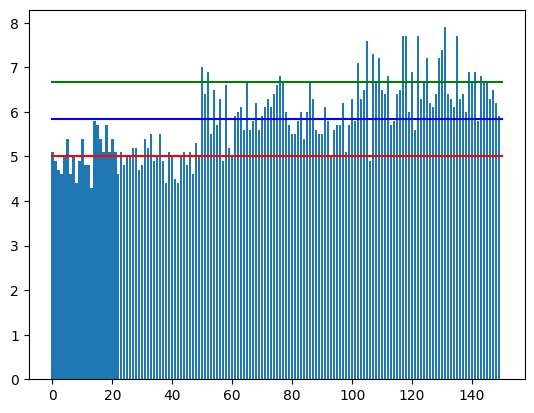

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
iris= pd.read_csv("./iris.csv")
for column in iris.select_dtypes(include=np.number).columns:
    print(f"Mean of {column} =", np.mean(iris[column]))
    print(f"Median of {column} =", np.median(iris[column]))

    ranges = np.max(iris[column]) - np.min(iris[column])
    std = np.std(iris[column])
    print(f"Ranges of {column} =", ranges)
    print(f"Standard deviation of {column} =", std)

# Visualization for one numeric column
y_pos = range(len(iris))
plt.bar(y_pos, iris['sepal_length'])  # sepal_length
plt.plot((0, len(iris)), (iris['sepal_length'].mean(), iris['sepal_length'].mean()), 'b-')# the center
plt.plot((0, len(iris)), (iris['sepal_length'].mean() + iris['sepal_length'].std(), iris['sepal_length'].mean() + iris['sepal_length'].std()), 'g-') # the mean plus the standard deviation
plt.plot((0, len(iris)), (iris['sepal_length'].mean() - iris['sepal_length'].std(), iris['sepal_length'].mean() - iris['sepal_length'].std()), 'r-')  # the mean minus the standard deviation
plt.show()


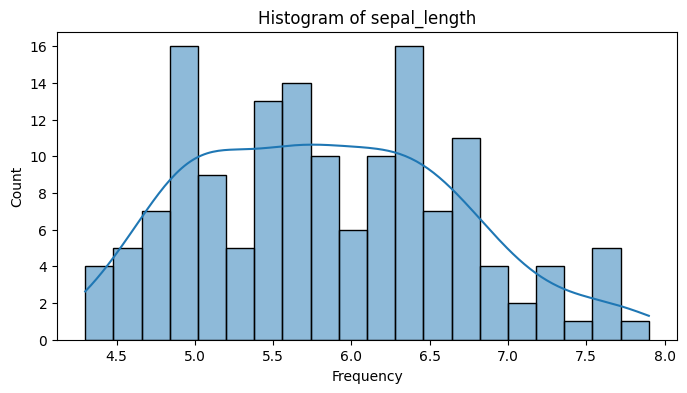

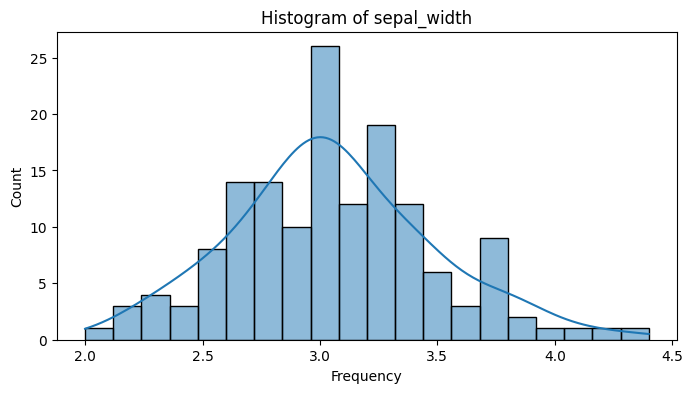

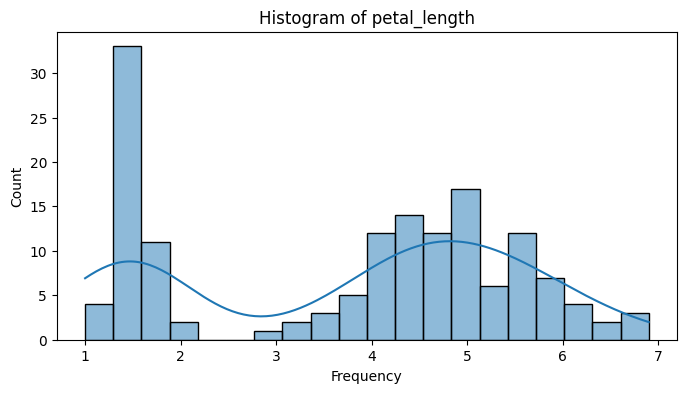

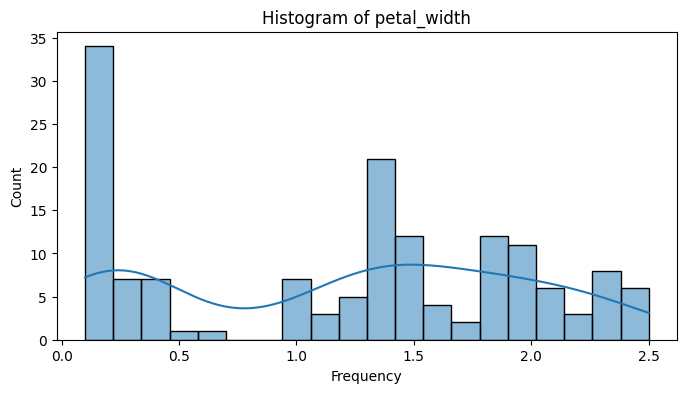

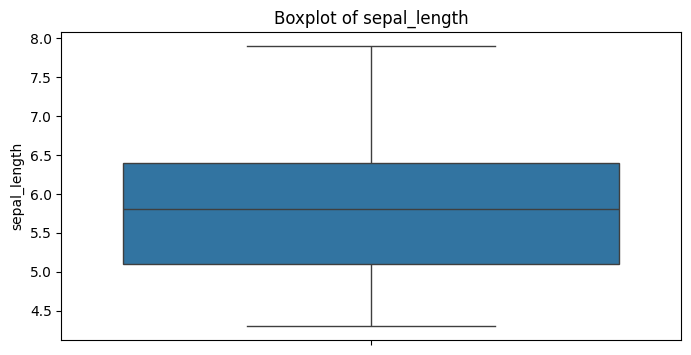

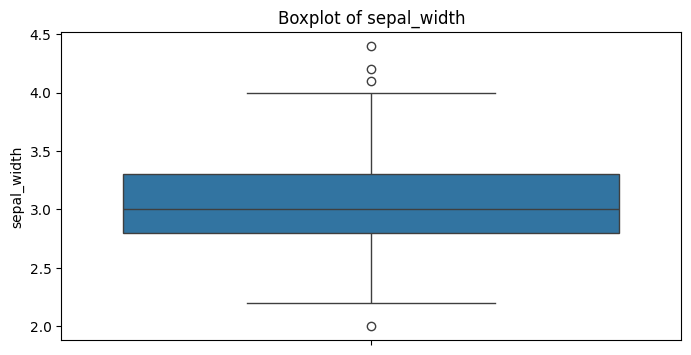

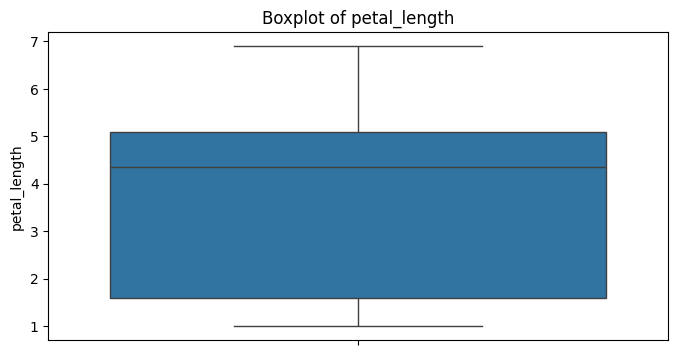

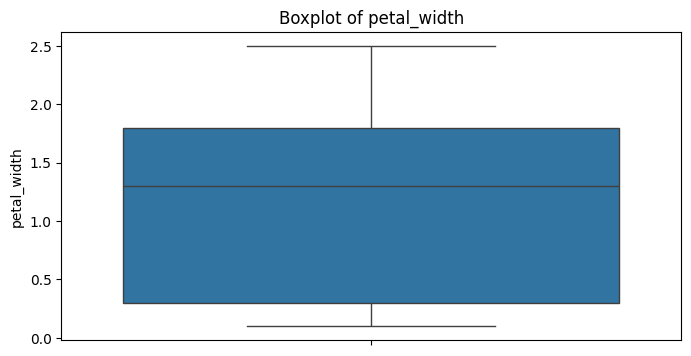

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
iris = pd.read_csv("./iris.csv")

# Create histograms for each numeric column
numeric_columns = iris.select_dtypes(include=np.number).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(iris[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.xlabel('Frequency')
    plt.show()

# Create boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=iris[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()


<Axes: ylabel='sepal_length'>

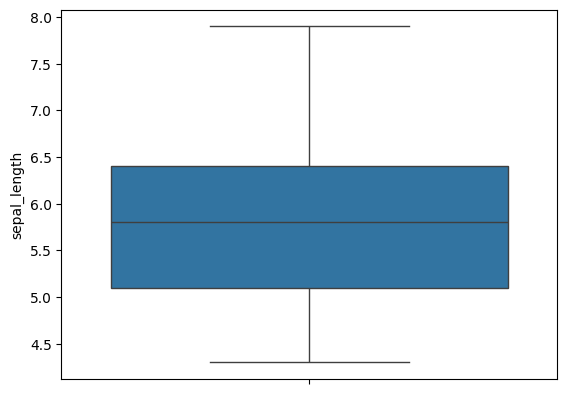

In [ ]:
sns.boxplot(df['sepal_length'])

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

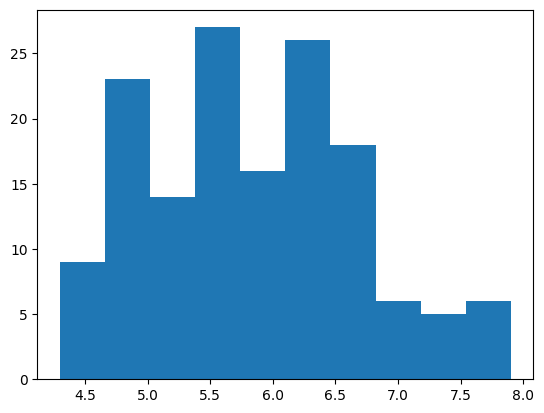

In [ ]:
plt.hist(df['sepal_length'])

# 2. Conditional Probability

Given the following table of events, compute P(A∣B) and P(B∣A)
|               |       B         |        not B         |
|   A           |       30        |         20           |
| not A         |       50        |         100          |

In [ ]:

# For P(A|B)
# Calculate P(A ∩ B) and P(B)
P_A_and_B = 30 / 200
P_B = 80 / 200

# Conditional Probability P(A|B)
P_A_given_B = P_A_and_B / P_B

# Print the result
print(f"Conditional Probability P(A|B) = {P_A_given_B:.2f}")

# For P(B|A)
P_A = 50 / 200

# Conditional Probability P(A|B)
P_B_given_A = P_A_and_B / P_A

# Print the result
print(f"Conditional Probability P(B|A) = {P_B_given_A:.2f}")

Conditional Probability P(A|B) = 0.37
Conditional Probability P(B|A) = 0.60


# 3. Bayes' Theorem

A model classifies spam emails with the following probabilities:
P(Spam)=0.2
P(Not Spam)=0.8
P(Keyword | Spam)=0.7
P(Keyword | Not Spam)=0.1
Compute the probability that an email is spam given that it contains the keyword.

In [ ]:
# Given probabilities
P_Spam = 0.2
P_Not_Spam = 0.8
P_Keyword_given_Spam = 0.7
P_Keyword_given_Not_Spam = 0.1

# Calculate P(Keyword)
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_Not_Spam * P_Not_Spam)

# Calculate P(Spam|Keyword)
P_Spam_given_Keyword = (P_Keyword_given_Spam * P_Spam) / P_Keyword

# Print the result
print(f"The probability that an email is spam given that it contains the keyword is  {P_Spam_given_Keyword:.2f}")


The probability that an email is spam given that it contains the keyword is  0.64


# 4. Outlier Detection, Removal, and Feature Scaling

Choose a dataset on your own and perform the following operation
Compute Q1 (25th percentile) and Q3 (75th percentile) for each feature.
Calculate the IQR (IQR=Q3−Q1).
Define outliers as values outside the range [Q1−1.5⋅IQR,Q3+1.5⋅IQR].
Create a function to detect and remove outliers for all numerical features.
Plot boxplots of features before and after outlier removal.  
Plot histograms of a few features before and after applying normalization and standardization.

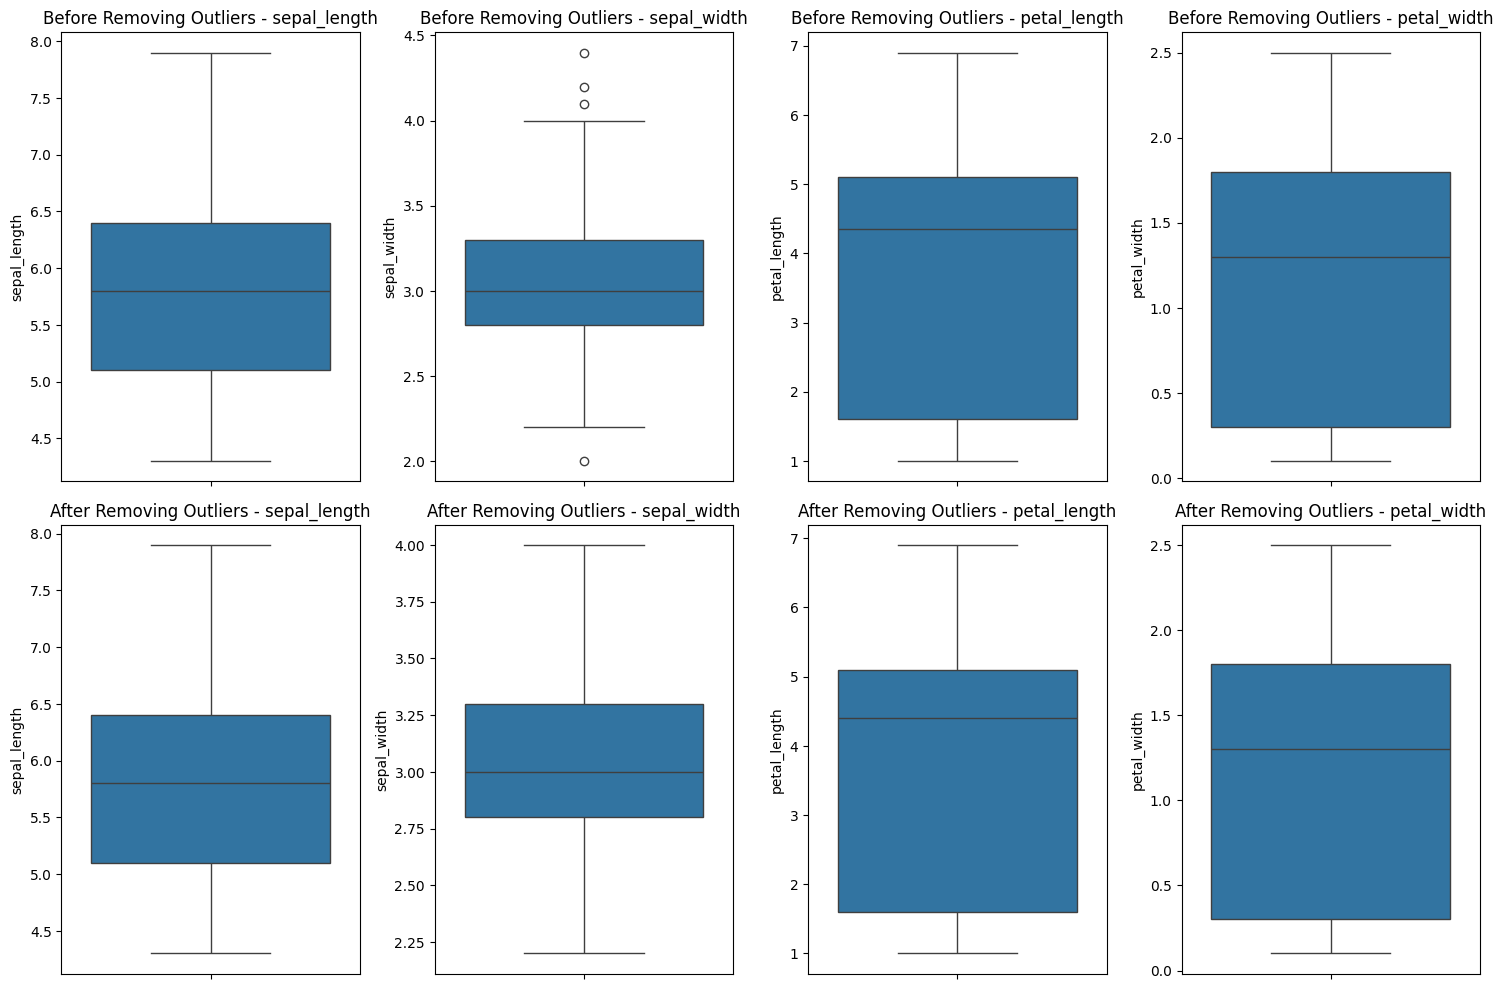

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
iris = pd.read_csv("./iris.csv")

# Filter numeric columns
numeric_columns = iris.select_dtypes(include=np.number).columns

# Placeholder for filtered data
filtered_iris = iris.copy()

for column in numeric_columns:
    # Step 1: Calculate Q1, Q3, and IQR
    Q1 = np.percentile(iris[column], 25)
    Q3 = np.percentile(iris[column], 75)
    IQR = Q3 - Q1

    # Step 2: Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Remove outliers
    filtered_iris = filtered_iris[(filtered_iris[column] >= lower_bound) & (filtered_iris[column] <= upper_bound)]

# Plotting before and after removing outliers
fig, axes = plt.subplots(2, len(numeric_columns), figsize=(15, 10))

for i, column in enumerate(numeric_columns):
    # Before removing outliers
    sns.boxplot(data=iris, y=column, ax=axes[0, i])
    axes[0, i].set_title(f"Before Removing Outliers - {column}")

    # After removing outliers
    sns.boxplot(data=filtered_iris, y=column, ax=axes[1, i])
    axes[1, i].set_title(f"After Removing Outliers - {column}")

plt.tight_layout()
plt.show()
